# Explore here

In [20]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
total_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [21]:
'''We need to extract just the useful columns from this data set represented as X, which includes the 
latitude, longitude, and the MedInc columns'''

X = total_data[['MedInc', 'Latitude', 'Longitude']]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [22]:
# Dividing the data set into a train and test

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)

print(X_train.head())
print()
print(X_test.head())

       MedInc  Latitude  Longitude
14196  3.2596     32.71    -117.03
8267   3.8125     33.77    -118.16
17445  4.1563     34.66    -120.48
14265  1.9425     32.69    -117.11
2271   3.5542     36.78    -119.80

       MedInc  Latitude  Longitude
20046  1.6812     36.06    -119.01
3024   2.5313     35.14    -119.46
15663  3.4801     37.80    -122.44
20484  5.7376     34.28    -118.72
9814   3.7250     36.62    -121.93


In [23]:
'''Step 2: Build a K-Means. Classify the data into 6 clusters using the K-Means model. 
Then store the cluster to which each house belongs as a new column in the dataset. 
You could call it cluster. To introduce it to your dataset you may have to categorize 
it. See what format and values it has and act accordingly. Plot it in a dot plot and
describe what you see.'''

from sklearn.cluster import KMeans

unsupervised_ds = KMeans(n_clusters=6, n_init='auto', random_state=42)
unsupervised_ds.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [30]:
# Insertion of clusters into the training dataset

y_train = list(unsupervised_ds.labels_)
X_train['Cluster'] = y_train
X_train.head()

,MedInc,Latitude,Longitude,Cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


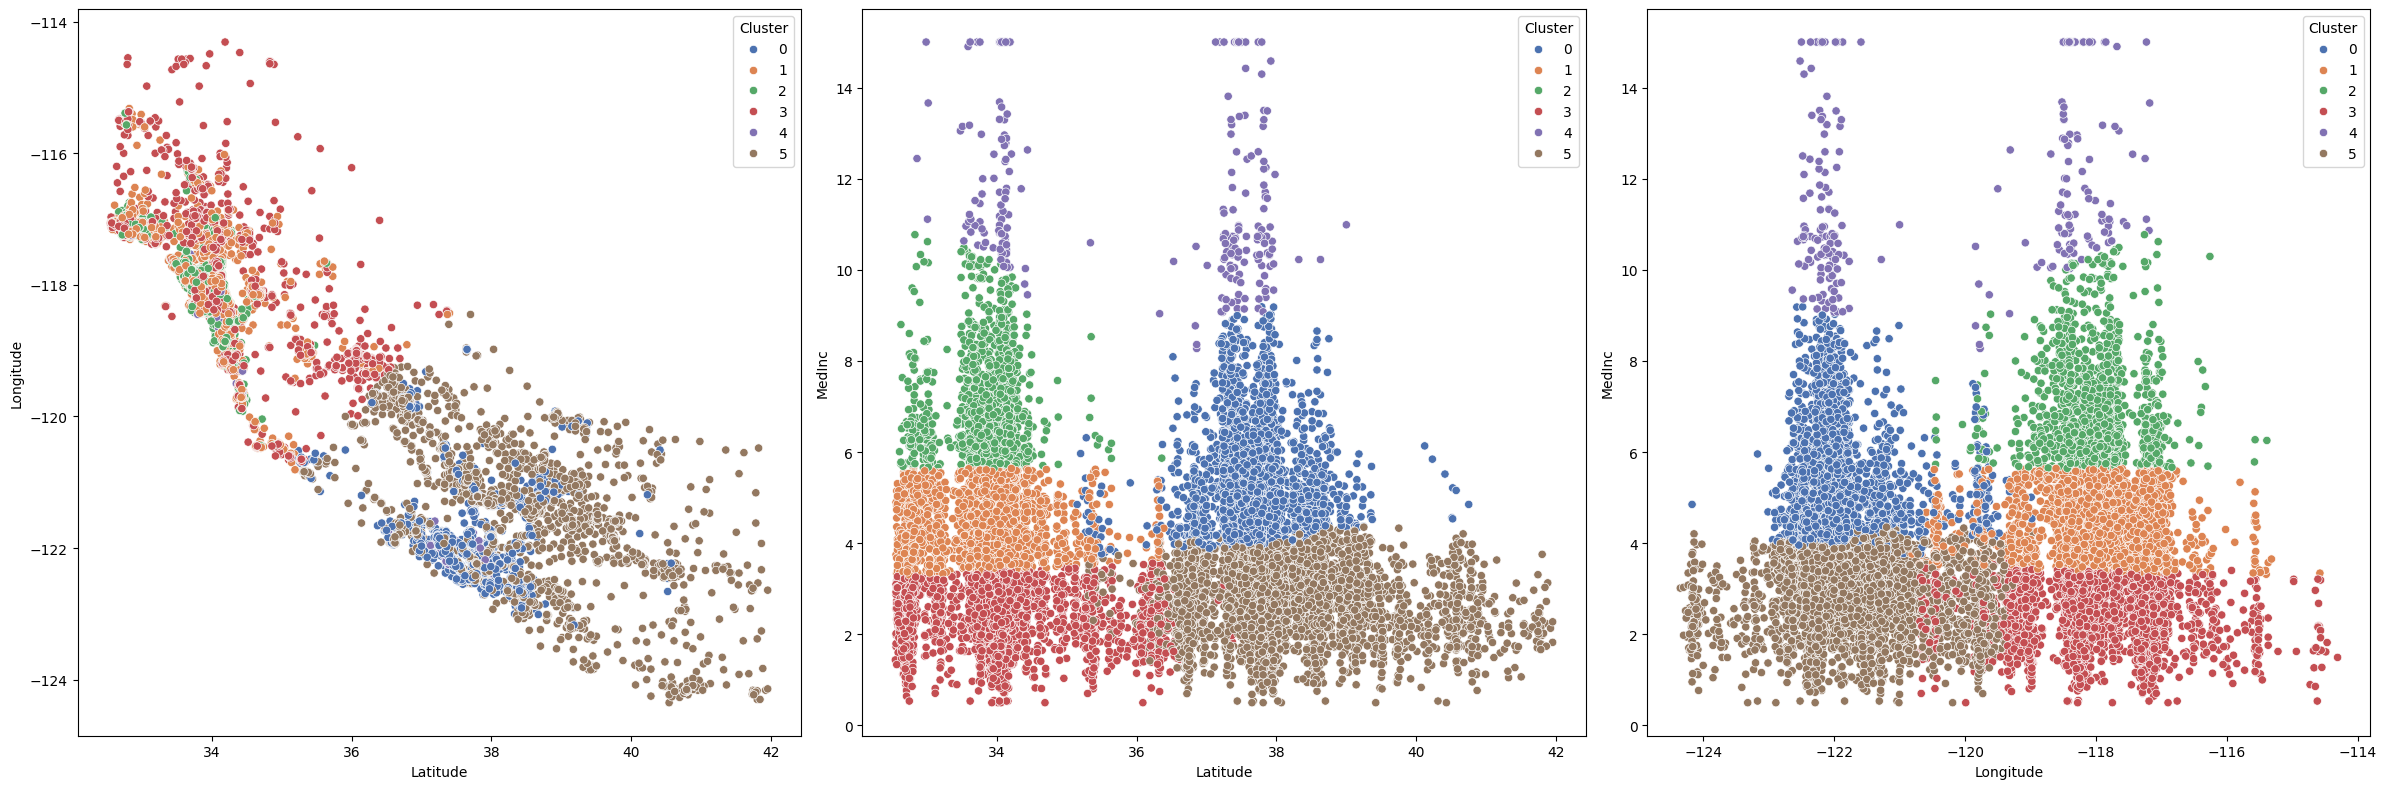

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a scatterplot showing the relationship between Latitude, Longitude, and the 

fig, axis = plt.subplots(1, 3, figsize = (24, 8))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "deep")
plt.tight_layout()

plt.show()


In [ ]:
# Elbow Method

📝 Instructions
House grouping system
We want to be able to classify houses according to their region and median income. To do this, we will use the famous California Housing dataset. It was constructed using data from the 1990 California census. It contains one row per census block group. A block group is the smallest geographic unit for which US Census data is published.

Be sure to conveniently split the dataset into train and test as we have seen in previous lessons. Although these sets are not used to obtain statistics, you can use them to train the unsupervised algorithm and then to make predictions about new points to predict the cluster they are associated with.

Step 2: Build a K-Means
Classify the data into 6 clusters using the K-Means model. Then store the cluster to which each house belongs as a new column in the dataset. You could call it cluster. To introduce it to your dataset you may have to categorize it. See what format and values it has and act accordingly. Plot it in a dot plot and describe what you see.

Step 3: Predict with the test set
Now use the trained model with the test set and add the points to the above plot to confirm that the prediction is successful or not.

Step 4: Train a supervised classification model
Now that K-Means has returned a categorization (clustering) of the points for the training and test sets, study which model might be most useful and train it. Get the statistics and describe what you see.

This flow is very common when we have unlabeled data: use an unsupervised learning model to label it automatically and then a supervised learning model.

Step 5: Save the models
Store both models in the corresponding folder.